# **RFM Analysis**

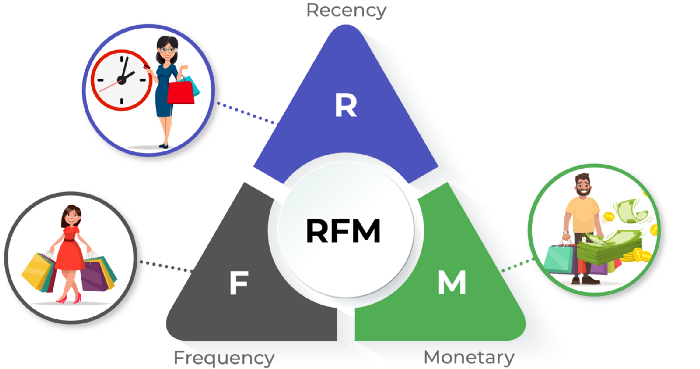

Content:
    
1. [What is RFM Analysis](#1) 
    
* [What inforamtion we can reveal after performing RFM Analysis?](#2)
    
2. [About the dataset ](#3)
    
* [Definiton of Variables ](#4)
* [Business goal ](#5)
   
3. [Coding Part](#6)
* [1. Loading the Dataset & Checking Variables](#6)
* [2. Answering some analytical questions about the data](#7)
* [3. Data preprocessing](#8)
* [4. Getting R, F and M metrics](#9)
* [5. Converting R, F and M metrices to R, F and M scores](#10)
* [6. Calculating RFM score](#11)
* [7. Segmenting customers using RFM score.](#12)
4. [Conclusion](#13)

<a id = "1"></a>
# **What is RFM Analysis?**
RFM analysis is a technique for categorizing customers based on their purchasing behavior. This segmentation method allows marketing teams to target customers with personalized marketing campaigns. Instead of analyzing the entire customer base as a whole, it's better to segment them into homogenous groups, understand the traits of each group, and engage them with relevant campaigns.

RFM stands for **R**ecency, **F**requency, and **M**onetary value. That means we have to use these metrics in order to perform this method. So what are these values?
* **Recency** : The freshness of customer activity. It's the time difference between the last purchase date of the customer and the date of analysis.
* **Frequency** : The frequency of the customer transaction, means a total number of transactions.
* **Monetary** : Sum of each purchase that has been made by each customer.  

 <a id = "2"></a>
#### **What inforamtion we can reveal after performing RFM Analysis?**
* Who are your best customers?
* Which customers have a chance to churn?
* Who has the potential to become valuable customers?
* Who are your loyal customers?
* Who are your new customers?
* Which customers is critical to retain?
* Which group of customers is most likely to respond to your current campaign?
* Which customers are lost? 

and more

#### **After a brief explanation of what is RFM let's move on to performing RFM to real-life data**

 <a id = "3"></a>
### **About the dataset :**
* This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.
 <a id = "4"></a>
### **Definiton of Variables :**
1. **Invoice:** Invoice number, unique identifier variable for each transaction. Refund invoice numbers starts with "C"
2. **StockCode:** Unique product code
3. **Description:** Product name
4. **Quantity:** The number of product in the invoice
5. **InvoiceDate:** Date and time of the purchase
6. **Price:** Unit price of a product (in terms of Sterlin)
7. **CustomerID:** Unique customer identifier
8. **Country:** Residential country of customers


 <a id = "5"></a>
### **Business goal**
* We want to segement the Customers based on RFM so that the company can target its customers efficiently.

 <a id = "6"></a>
# **Let's dive into coding part.**
### 1. Loading the Dataset & Checking Variables

In [ ]:
!pip install openpyxl

In [ ]:
# First let's import libraries
import datetime as dt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading 2010-2011 version of data
df_ = pd.read_excel('../input/online-retail-ii-data-set-from-ml-repository/online_retail_II.xlsx', sheet_name="Year 2010-2011")

In [ ]:
df = df_.copy()

It is better to get a habit of working copy of the data after reading it, especially when the data is large. We might need the first version of the data in further steps so by this way we will not deal with reading data again we will just run this cell for that. Reading large data again takes a quite long time.

In [ ]:
# Taking look at some descriptive statistics
df.describe().T
# As we see there are negative numbers in 'Price' and 'Quantity' which is abnormal we have to get rid of it 

In [ ]:
# Is there any missing value in the dataset?
df.isnull().values.any() # Since we get 'True' that means there is

In [ ]:
# Let's see how many missing value does dataset have in its each column
df.isnull().sum()

In [ ]:
# Simply let's get rid of the rows that contain missing value
df.dropna(inplace=True)

 <a id = "7"></a>
## **2. Answering some analytical questions about the data**

In [ ]:
# How many unique product do we have in the data?
df.loc[:, 'Description'].nunique() 

In [ ]:
# How many of each product are there? 
df.loc[:, 'Description'].value_counts()

In [ ]:
# Ranking the 5 most ordered products from most to least.
df.groupby('Description').agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False).head(5)

 <a id = "8"></a>
# 3. Data Preprocessing
* From dataset story we have been informed that if there is 'C' in the 'Invoice' column's variable that means this transaction is canceled. So we have to remove these canceled transactions from the dataset.

In [ ]:
df = df[~df['Invoice'].str.contains('C', na=False)]

In [ ]:
df.head()

In [ ]:
# While investigating our data we noticed that we don't have the amount of money that has been spent on each bought product
# Since we will need it we have to create it by ourselves
# In order to create that missing column we just have to multiply 'Price' and 'Quantity'
df['TotalPrice'] = df['Quantity'] * df['Price']

 <a id = "9"></a>
# 4. Getting R, F and M metrics
* For this work we suppose F and M metrics are highly correlated, so if F is high M will be high as well. We will calculate the M metric and score for each customer just for showing how to calculate it but we will not use it while calculating the RFM score. We will calculate RFM without taking M. But if someone wants to include also M in his/her work, they can. You will just need to change the structure of the code a little bit. The main concept will still remain the same. It depends on the company whether they want to include M in their study or not.

In [ ]:
today_date = dt.datetime(2011, 12, 11) # We have to set today date in order to calculate Recency metric
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days, # Recency calclation
                                     'Invoice': lambda num: num.nunique(), # Frequency calculation
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()}) # Monetary calculation
rfm.head()

In [ ]:
# Let's change column names in order to make it more understandable
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()
# Consequently we have calculated R, F and M metrics

In [ ]:
# It is obvious that we can't have Monetary value equal to 0 so let's get rid of it
rfm = rfm[rfm['Monetary'] > 0]

 <a id = "10"></a>
# 5. Converting R, F and M metrices to R, F and M scores
* In order to calculate RFM scores we have to convert our R, F and M metrics to scores. For that, we just have to change these metrics into [1,2,3,4,5] values. 

<a id = "10"></a>

In [ ]:
# Converting Recency

# qcut() function orders values with ascending order. For recency if the value is small that means customer bought something recently.
# So we have to give our highest score to the group that have the lowest recency values
# for that reason we labeled our groups in [5, 4, 3, 2,1] order
rfm['recency_score'] = pd.qcut(rfm['Recency'], 5, [5, 4, 3, 2,1])
rfm.head()

In [ ]:
# Converting Frequency

#It's contrary in frequnecy scenario. If the frequency of customer is high we have to give 5 score to him/her. Therefore we have to give [1, 2, 3, 4, 5] order
rfm['frequency_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, [1, 2, 3, 4, 5]) 
rfm.head()

In [ ]:
# Converting Monetary
# Similar with frequency part [1, 2, 3, 4, 5] order.
rfm['monetary_score'] = pd.qcut(rfm['Monetary'], 5, [1, 2, 3, 4, 5]) 
rfm.head()

 <a id = "11"></a>
# 6. Calculating RFM score.
* As I mentioned in previous parts we will not consider M score while calculating RFM score.

In [ ]:
# If we concatenate R and F scores we will simply get RFM score  
rfm['RFM_SCORE'] = (rfm['recency_score'].astype('str') + rfm['frequency_score'].astype('str'))
rfm.head()

 <a id = "12"></a>
# 7. Segmenting customers using RFM score.

In [ ]:
# For that part we will use regex
seg_map = {
    r'[1-2][1-2]': 'hibernating', # For instance means: If F is 1 or 2 and If R is 1 or 2 give hibernating 
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

In [ ]:
# If you want to send Customer ID's of for instance 'at_Risk' group segmented customers to your manager in excel format you can use this code
new_df = pd.DataFrame()
new_df['at_Risk_id'] = rfm[rfm['segment'] == 'at_Risk'].index
new_df.to_excel('new_excel.xlsx')

##### **Actually we have finished our RFM segmentation, Let's know analyse what do these gorups mean?**

 <a id = "13"></a>
# Conclusion
* We have finished our segmentation, let's see what do these group mean?
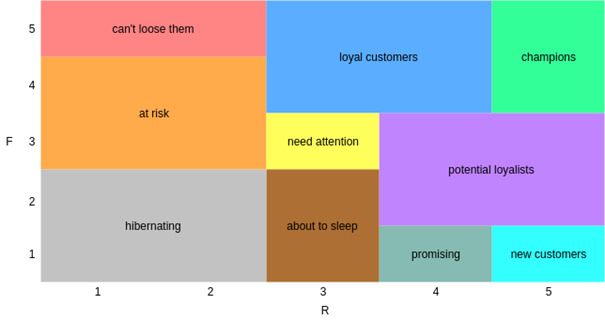
* For instance let's take 3 groups for analysing and mentioning what actions can a company take for these groups.
    * **Can't loose them** : The RFM_SCORE of this group is '15' so these are our top purchasers considering all other customers but they haven't visited our site for a long time. It is necessary to take care of these customers and get them to re-shop in some way. They used to purchase frequently but haven’t returned for a long time. We must not loose that gorup. Because their number transaction is really high, but unfortunately they are not active for a long time. We have to win them back, make them special offers and make them feel valuable. Also we can conduct a survey for that group for investigating why they are not present for a long time, it's abnormal because their frequency is the most among all customers.
    * **new_customers** : The RFM_SCORE of this group is '51', so their Recency value is one of the best(5) when considering all other customers, and its Frequency value is 1, that is one of the least considering all customers. That's why we name this group new_customers. They just visited our site. We can offer them some special 'Welcome' offers.
    * **need_attention** : The RFM_SCORE of this group is '33' - so this group needs to be taken care of, if special attention is given this group they can be in 'loyal_customer', 'potential_loyalist' or either 'champions' groups, otherwise they can be in 'at risk', 'about to sleep' or 'hibernating' gropus. This group is in the middle when all customers are considered in terms of both 'frequency' and 'recency' values. The action decisions we will take can move these group into more valuable groups.
### You can analyse others by yourself in the same way
### **I hope you enjoyed while reading this notebook, if you liked it please upvote** :)